### Project Description

#### What is Customer Segmentation? 
#### -> Customer segmentation is the process of identifying different groups of customers based on the category they belong such as demographics or behaviors so that the sales/marketing team can reach out to those specific customers effectively.

#### -> When you perform customer segmentation, you find similar characteristics in each customer’s behaviour and needs. Then, those are generalized into 
#### groups to satisfy demands with various strategies. Moreover, those strategies can be an input of the:

#### i) Focused marketing efforts on particular demographics#### ii) Iintroduction of features in line with user deman
#### iii) Creation of the product roadmapap

#### We are going perform segmentation by using the following 3 algorithms

##### i) K-means
##### ii) Hierarchical
##### iii) DBSCAN (Density Based Spatial Clustering of Applications with Noise)

#### Primary goal to help data supermarket increase their business by getting more memberships.
#### for this we will try and explore different clustering techniques and perform a customer segmentation. That is nothing but identifying and making groups based on some 
#### similar characteristics of customer preferences and purchasing history and allow companies to market to each gorup more efficiently. 
#### We shall further develop some clustering models to gain better understandidng of the type of the customer.
#### This includes clustering algorithms such as K-means, Hierarchical Clustering and DBSCAN.

#### Data Overview

###### The data consists of 200 customers with information related to their age, gender, annual income, and spending score. 
###### The spending score is a numeric variable ranging from 1 to 100 and was assigned to customers based on behavior parameters and purchasing data.
###### The data set also contains the customer's ID, which will be dropped before beginning the analysis.

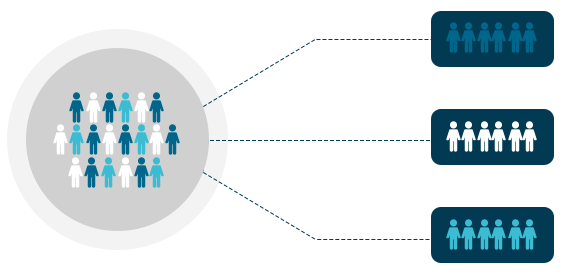

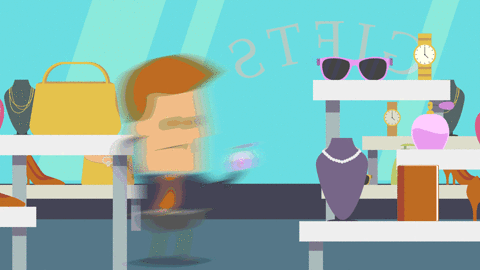

Let us now import some python libraries that required to perform further analysis 

In [47]:
# import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import seaborn as sns
# # init_notebook_mode(connected = true)
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples,silhouette_score
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram
# from sklearn.cluster import DBSCAN
# from collections import Counter
# from sklearn.decomposition import PCA

import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


In [48]:
cust_data = pd.read_csv('Mall_Customers (1).csv')
cust_data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Data Summary 

In [49]:
#.shpae function returns the dimensions for the given dataset i.e. number of rows and columns
# In following case we have 200 rows and 5 columns
cust_data.shape

(200, 5)

In [50]:
# this method is used to get a statistical overview of the dataset it includes mean total count standard deviation etc.
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
#Here we are checking if there are any null values in the dataset.
cust_data.isnull().values.any()

False

In [53]:
cust_data.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)

### EDA (Exploratory Data Analysis)

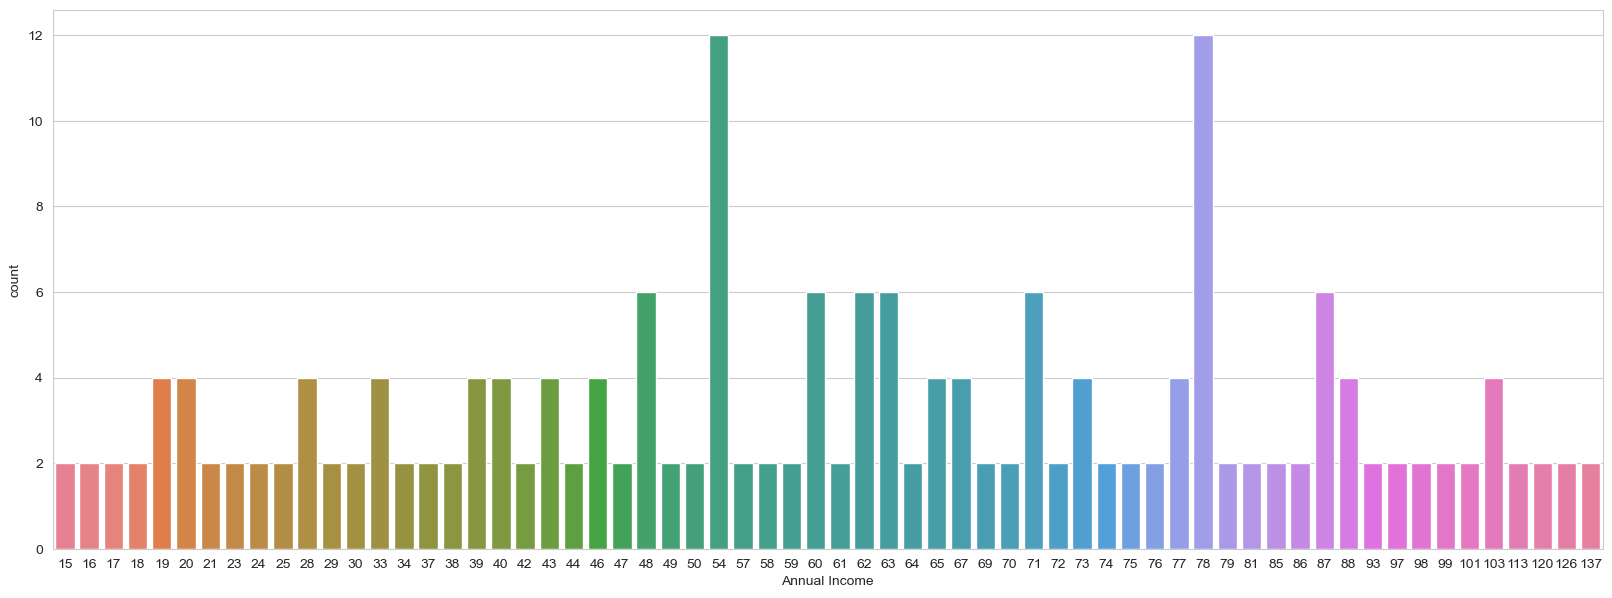

In [54]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income", data=cust_data, palette='husl');

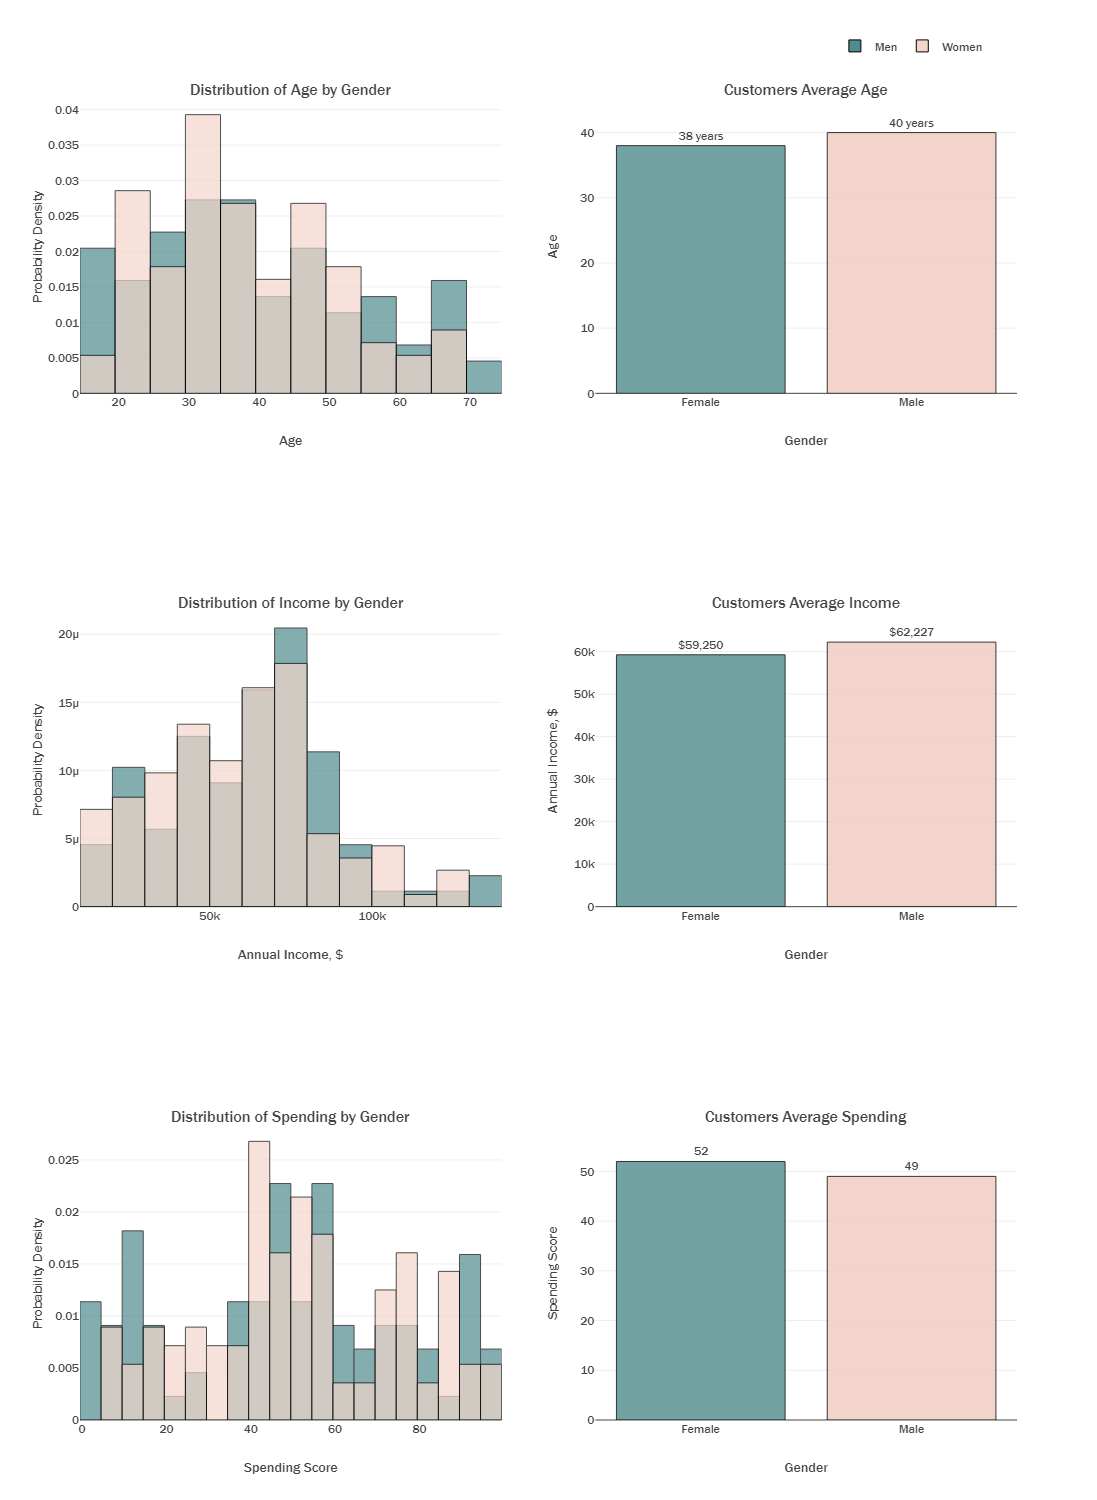

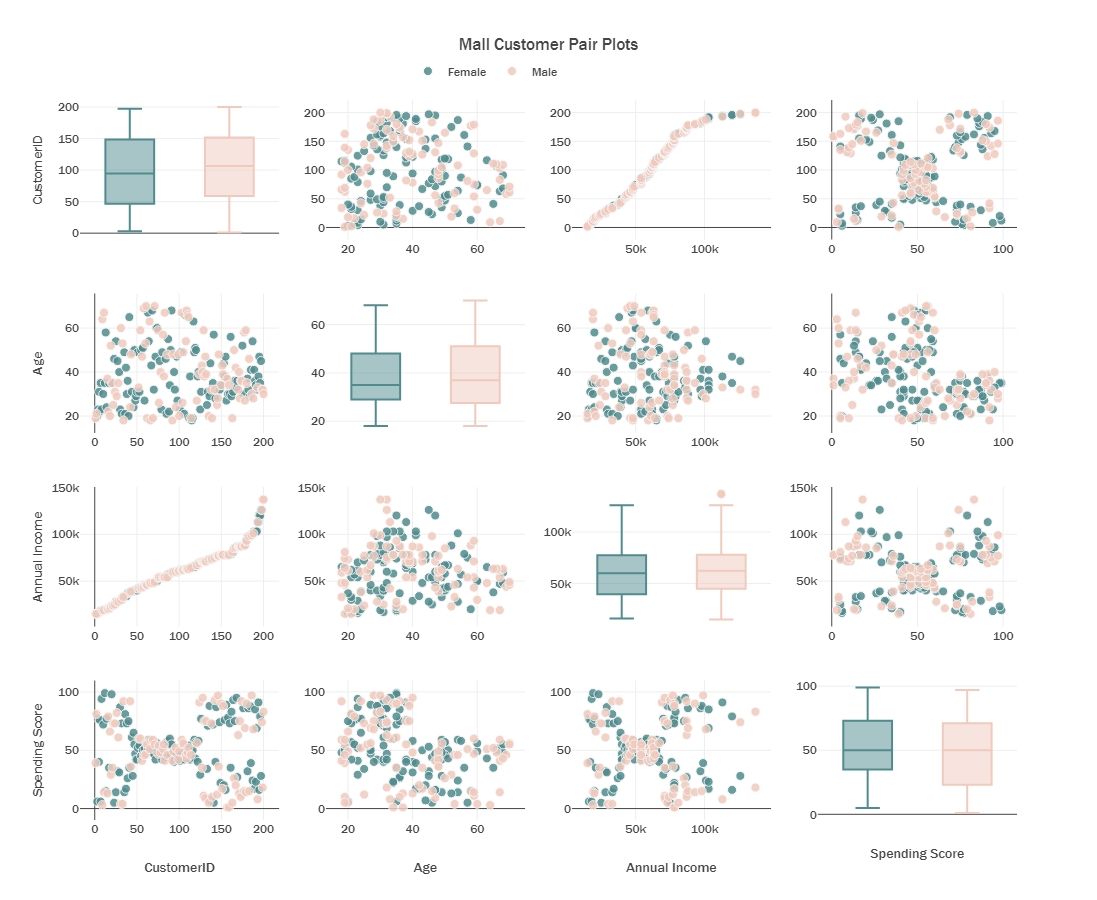

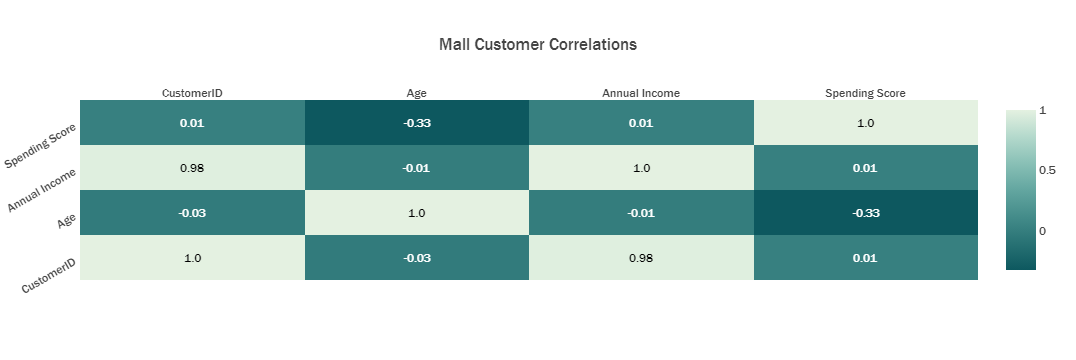

In [55]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Assuming cust_data is your DataFrame containing customer data

# Modify cust_data to convert 'Annual Income' to dollars
cust_data['Annual Income'] = cust_data['Annual Income'].mul(1000)

# Grouping data for plots
p1 = cust_data.groupby('Gender')['Age'].mean().round(0).astype(int).reset_index()
p2 = cust_data.groupby('Gender')['Annual Income'].mean().reset_index()
p3 = cust_data.groupby('Gender')['Spending Score'].mean().round(0).astype(int).reset_index()

# Creating a layout template
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

# Creating subplots
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Distribution of Age by Gender",
                                    "Customers Average Age",
                                    "Distribution of Income by Gender",
                                    "Customers Average Income",
                                    "Distribution of Spending by Gender",
                                    "Customers Average Spending")
                   )

# Adding histograms for age distribution by gender
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Male']['Age'], histnorm='probability density',
                           marker=dict(color='#508B8D', opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Men"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Female']['Age'], histnorm='probability density',
                           marker=dict(color='#F3D6CB', opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Women"),
              row=1, col=1)

# Adding bar chart for average age by gender
fig.add_trace(go.Bar(x=p1['Gender'], y=p1['Age'], text=p1['Age'], texttemplate='%{text} years', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8), width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} years<extra></extra>', showlegend=False),
              row=1, col=2)

# Adding histograms for income distribution by gender
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Male']['Annual Income'], histnorm='probability density',
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Female']['Annual Income'], histnorm='probability density',
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=2, col=1)

# Adding bar chart for average income by gender
fig.add_trace(go.Bar(x=p2['Gender'], y=p2['Annual Income'], text=p2['Annual Income'],
                     texttemplate='$%{text:,.0f}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8), width=.8,
                     hovertemplate='Average Income Among %{x} = $%{y}<extra></extra>', showlegend=False),
              row=2, col=2)

# Adding histograms for spending score distribution by gender
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Male']['Spending Score'], histnorm='probability density',
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Female']['Spending Score'], histnorm='probability density',
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=3, col=1)

# Adding bar chart for average spending score by gender
fig.add_trace(go.Bar(x=p3['Gender'], y=p3['Spending Score'], text=p3['Spending Score'],
                     texttemplate='%{text}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8), width=.8,
                     hovertemplate='Average Spending Score Among %{x} = %{y}<extra></extra>', showlegend=False),
              row=3, col=2)

# Updating traces and layout
fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(template=temp, barmode='overlay', height=1500, width=700,
                  legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.03, x=.97),
                  xaxis1_title="Age", yaxis1_title='Probability Density',
                  xaxis2_title="Gender", yaxis2_title="Age", yaxis2_range=[0, 45],
                  xaxis3_title="Annual Income, $", yaxis3_title='Probability Density',
                  xaxis4_title="Gender", yaxis4_title="Annual Income, $", yaxis4_range=[0, 69e3],
                  xaxis5_title="Spending Score", yaxis5_title='Probability Density',
                  xaxis6_title="Gender", yaxis6_title="Spending Score", yaxis6_range=[0, 59]
                  )
fig.show()

# Pairplots
fig = ff.create_scatterplotmatrix(cust_data, diag='box', index='Gender', colormap=['#508B8D', '#F0CABD'])
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Mall Customer Pair Plots", template=temp,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=900, width=700)
fig.show()

# Excluding non-numeric columns before calculating correlations
numeric_data = cust_data.select_dtypes(include=['number'])
corr = numeric_data.corr()

# Plotting correlation heatmap
x = corr.columns.tolist()
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint',
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Mall Customer Correlations", yaxis_tickangle=-30)
fig.show()

### Plotting Distribution for each Column in dataset


In [61]:
def distributionPlot(columnName):
    if not columnName == 'Gender':
        plt.figure()
        sns.distplot(cust_data[columnName], color="yellow", rug=True);

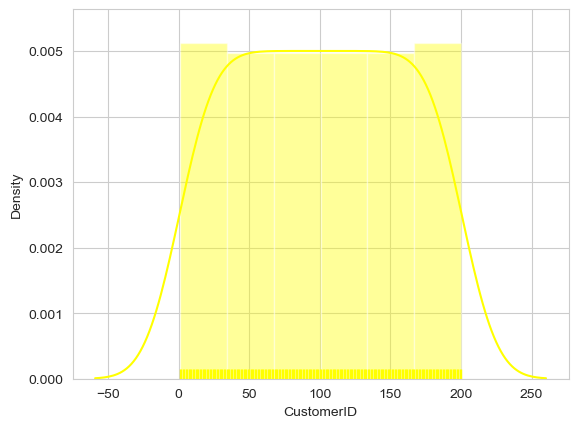

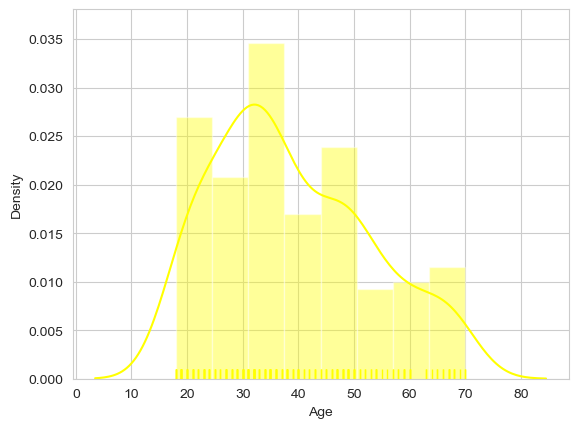

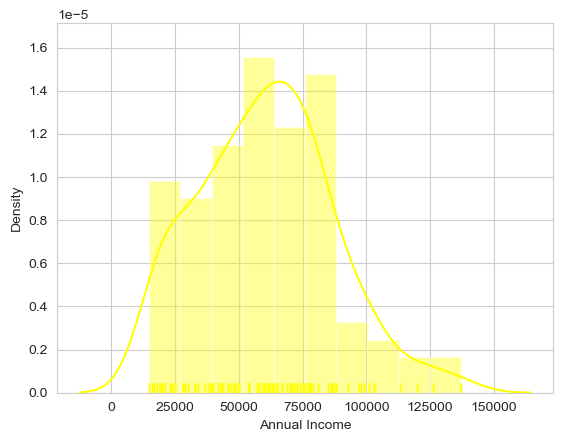

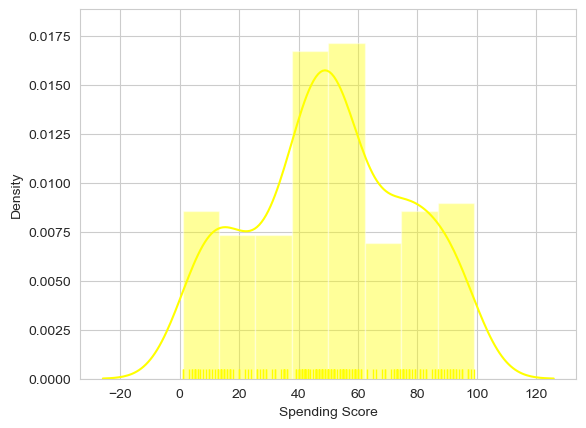

In [62]:
for column in cust_data.columns:
    distributionPlot(column)